<a href="https://colab.research.google.com/github/ajay8466/OIBSIP/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [28]:
data = pd.read_csv('/content/creditcard[1].csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0.00
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0.00
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0.00
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0.00
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0.00


In [29]:
data.shape

(170463, 31)

In [30]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170463 entries, 0 to 170462
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170463 non-null  float64
 1   V1      170463 non-null  float64
 2   V2      170463 non-null  float64
 3   V3      170463 non-null  float64
 4   V4      170463 non-null  float64
 5   V5      170463 non-null  float64
 6   V6      170463 non-null  float64
 7   V7      170463 non-null  float64
 8   V8      170463 non-null  float64
 9   V9      170463 non-null  float64
 10  V10     170463 non-null  float64
 11  V11     170463 non-null  float64
 12  V12     170463 non-null  float64
 13  V13     170463 non-null  float64
 14  V14     170463 non-null  float64
 15  V15     170463 non-null  float64
 16  V16     170463 non-null  float64
 17  V17     170463 non-null  float64
 18  V18     170462 non-null  float64
 19  V19     170462 non-null  float64
 20  V20     170462 non-null  float64
 21  V21     17

<Axes: >

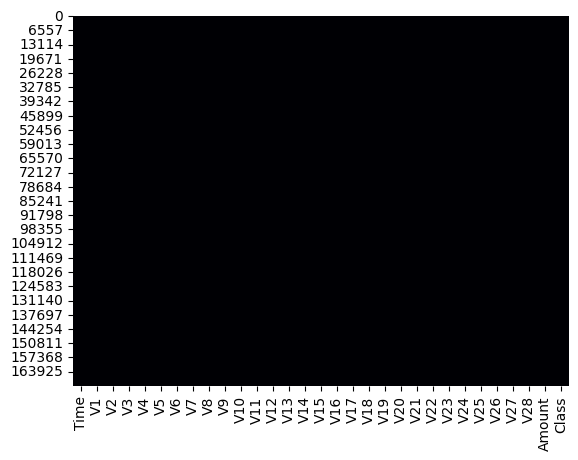

In [32]:
sns.heatmap(data.isnull(), cmap='magma', cbar=False)

In [33]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170463.00,170463.00,170463.00,170463.00,170463.00,170463.00,170463.00,170463.00,170463.00,170463.00,...,170462.00,170462.00,170462.00,170462.00,170462.00,170462.00,170462.00,170462.00,170462.00,170462.00
mean,60945.69,-0.17,0.04,0.50,0.12,-0.18,0.06,-0.08,0.03,0.02,...,-0.03,-0.08,-0.02,0.01,0.09,0.01,0.00,0.00,87.32,0.00
std,27706.57,1.85,1.61,1.38,1.37,1.34,1.30,1.21,1.23,1.15,...,0.74,0.67,0.58,0.60,0.47,0.49,0.39,0.31,246.03,0.05
min,0.00,-56.41,-72.72,-33.68,-5.52,-42.15,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-11.71,0.00,0.00
25%,41172.50,-0.99,-0.54,-0.06,-0.74,-0.83,-0.69,-0.59,-0.16,-0.66,...,-0.23,-0.55,-0.17,-0.33,-0.20,-0.33,-0.07,-0.03,5.47,0.00
50%,60665.00,-0.19,0.11,0.63,0.12,-0.23,-0.20,-0.03,0.06,-0.08,...,-0.05,-0.07,-0.04,0.06,0.14,-0.06,0.01,0.02,21.86,0.00
75%,78493.00,1.18,0.80,1.30,0.94,0.37,0.45,0.46,0.35,0.64,...,0.13,0.36,0.10,0.42,0.40,0.27,0.09,0.08,76.68,0.00
max,120194.00,2.44,22.06,9.38,16.88,34.80,22.53,36.68,20.01,15.59,...,27.20,10.50,19.00,4.02,7.52,3.52,12.15,33.85,19656.53,1.00


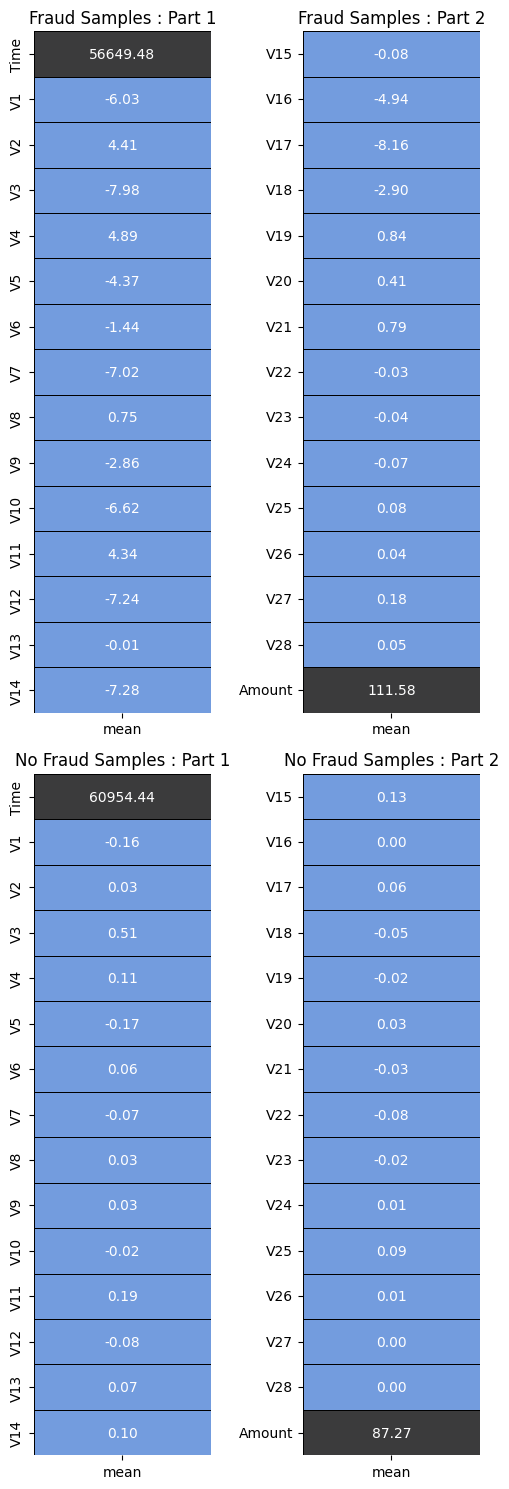

In [34]:
fraud = data[data['Class'] == 1].describe().T
nofraud = data[data['Class'] == 0].describe().T

colors = ['#739cde','#3B3B3C']

fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (5,15))
plt.subplot(2,2,1)
sns.heatmap(fraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 1');

plt.subplot(2,2,2)
sns.heatmap(fraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 2');

plt.subplot(2,2,3)
sns.heatmap(nofraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 1');

plt.subplot(2,2,4)
sns.heatmap(nofraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 2');

fig.tight_layout(w_pad = 2)

<ipython-input-35-760fb9e1c17d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class',data = data,edgecolor = 'black',palette = colors)
<ipython-input-35-760fb9e1c17d>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['No Fraud','Fraud'])


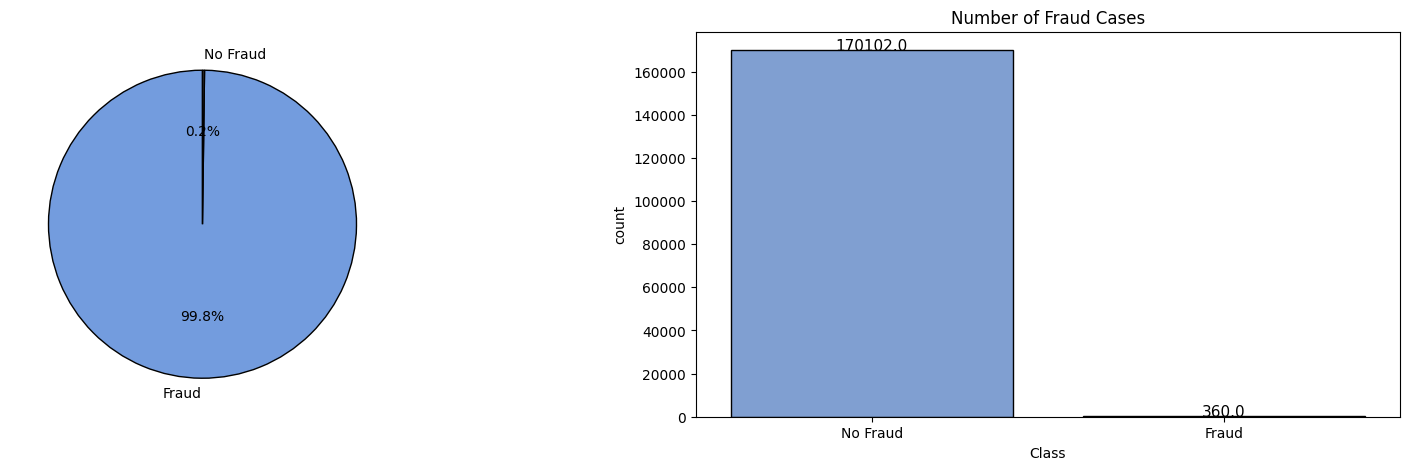

In [35]:
fraud = len(data[data['Class'] == 1]) / len(data) * 100
nofraud = len(data[data['Class'] == 0]) / len(data) * 100
fraud_percentage = [nofraud,fraud]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(fraud_percentage,labels = ['Fraud','No Fraud'],autopct='%1.1f%%',startangle = 90,colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)
ax = sns.countplot(x='Class',data = data,edgecolor = 'black',palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Fraud','Fraud'])
plt.title('Number of Fraud Cases');

<Axes: >

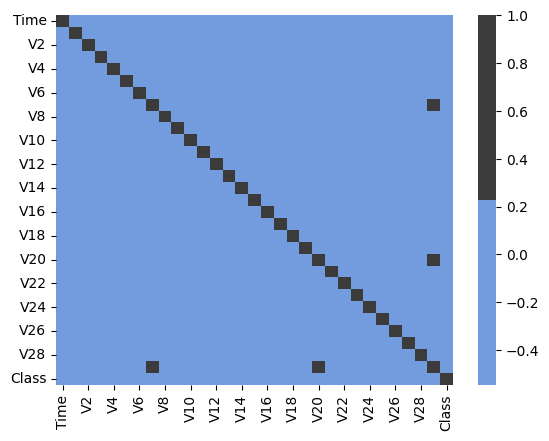

In [36]:
sns.heatmap(data.corr(),cmap = colors,cbar = True)

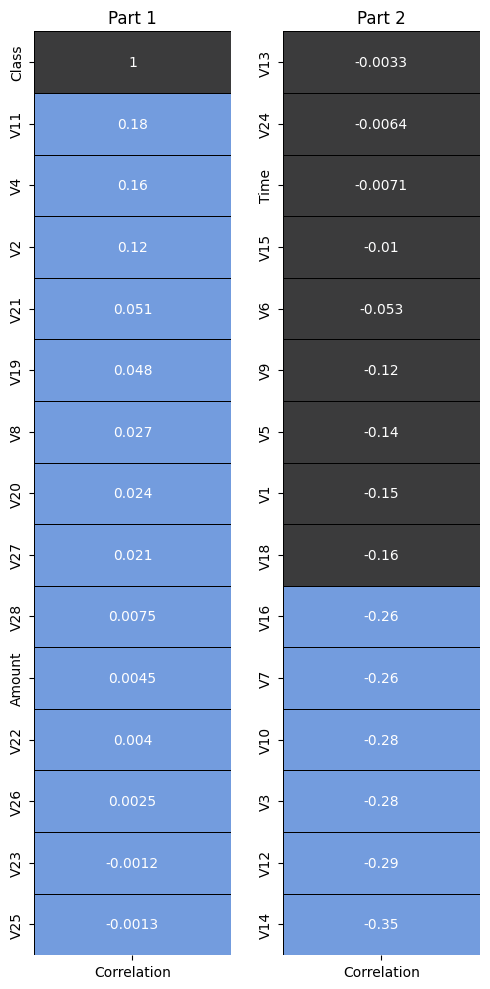

In [37]:
corr = data.corrwith(data['Class']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(corr.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 1')

plt.subplot(1,2,2)
sns.heatmap(corr.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 2')

fig.tight_layout(w_pad = 2)

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

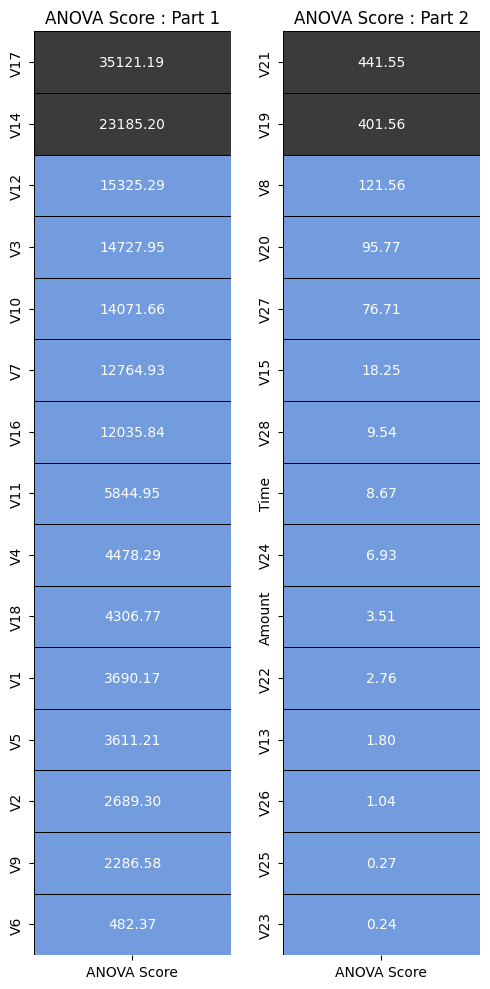

In [39]:
target = data.loc[:,'Class'].fillna(method='ffill').values
features = data.loc[:,data.columns !='Class'].fillna(method='ffill')

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])
featureScores = featureScores.sort_values(ascending = False,by = 'ANOVA Score')

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(featureScores.iloc[:15,:],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 1')

plt.subplot(1,2,2)
sns.heatmap(featureScores.iloc[15:30],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False, fmt = '.2f')
plt.title('ANOVA Score : Part 2')

fig.tight_layout(w_pad = 2)

In [40]:
df1 = data[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
df1.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.54,1.38,0.24,0.09,-0.55,-0.62,-0.31,-0.47,0.21,0.00
1,0.17,0.45,-0.08,-0.17,1.61,1.07,-0.14,0.46,-0.11,0.00
2,1.77,0.38,0.79,0.21,0.62,0.07,-0.17,-2.89,1.11,0.00
3,1.79,-0.86,0.24,-0.05,-0.23,0.18,-0.29,-1.06,-0.68,0.00
4,1.55,0.40,0.59,0.75,-0.82,0.54,-1.12,-0.45,-0.24,0.00


In [41]:
df2 = data.copy(deep = True)
df2.drop(columns = list(featureScores.index[20:]),inplace = True)
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,...,-0.62,-0.31,-0.47,0.21,0.03,0.40,0.25,-0.02,0.13,0.00
1,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,...,1.07,-0.14,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.01,0.00
2,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,...,0.07,-0.17,-2.89,1.11,-0.12,-2.26,0.52,0.25,-0.06,0.00
3,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,...,0.18,-0.29,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.06,0.00
4,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,...,0.54,-1.12,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.22,0.00


In [42]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [48]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.iloc[:,:9].fillna(method='ffill').values
t1 = df1.iloc[:,9].fillna(method='ffill').values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0.0: 3600, 1.0: 1800})

In [50]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f2 = df2.iloc[:,:20].fillna(method='ffill').values
t2 = df2.iloc[:,20].fillna(method='ffill').values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f2, t2 = pipeline.fit_resample(f2, t2)
Counter(t2)

Counter({0.0: 3600, 1.0: 1800})

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [52]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.20, random_state = 2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.20, random_state = 2)

In [53]:
def model(classifier,x_train,y_train,x_test,y_test):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

Cross Validation Score :  97.80%
ROC_AUC Score :  95.18%


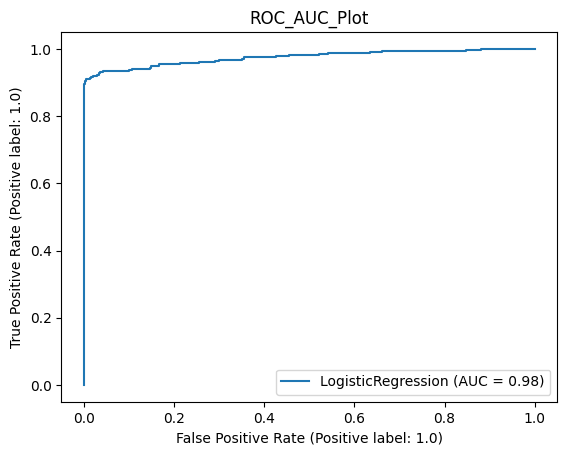

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       733
         1.0       0.99      0.91      0.95       347

    accuracy                           0.97      1080
   macro avg       0.97      0.95      0.96      1080
weighted avg       0.97      0.97      0.97      1080



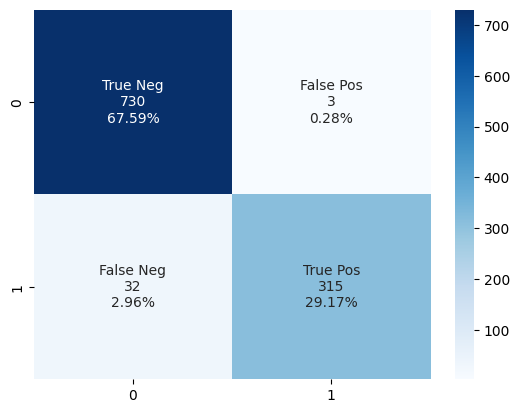

In [56]:
model(classifier_lr,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lr,x_test1,y_test1)

Cross Validation Score :  98.42%
ROC_AUC Score :  95.27%


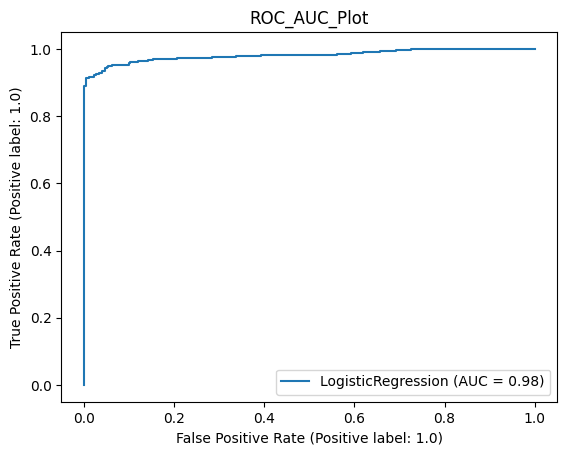

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       733
         1.0       0.98      0.91      0.95       347

    accuracy                           0.97      1080
   macro avg       0.97      0.95      0.96      1080
weighted avg       0.97      0.97      0.97      1080



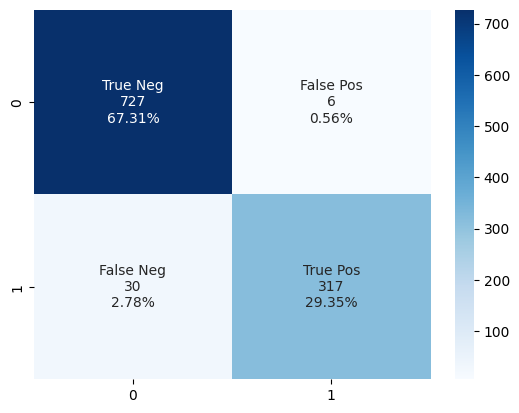

In [57]:
model(classifier_lr,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_lr,x_test2,y_test2)

In [58]:
from sklearn.svm import SVC

In [59]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

Cross Validation Score :  97.59%
ROC_AUC Score :  93.81%


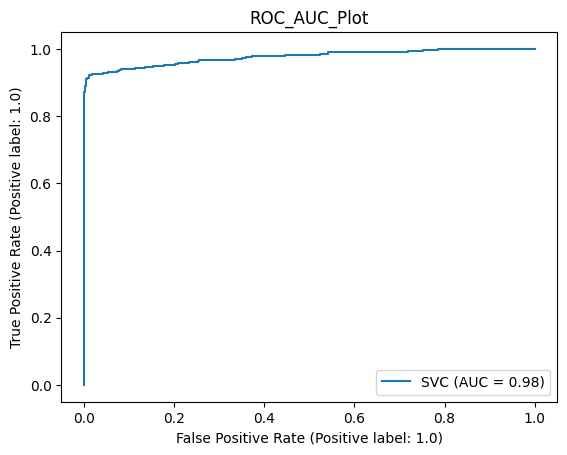

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       733
         1.0       0.99      0.88      0.93       347

    accuracy                           0.96      1080
   macro avg       0.97      0.94      0.95      1080
weighted avg       0.96      0.96      0.96      1080



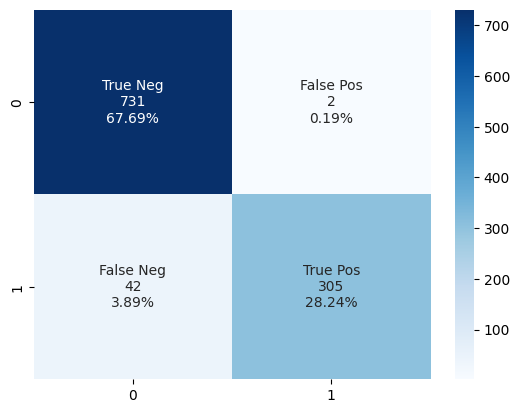

In [60]:
model(classifier_svc,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_svc,x_test1,y_test1)

Cross Validation Score :  98.28%
ROC_AUC Score :  94.68%


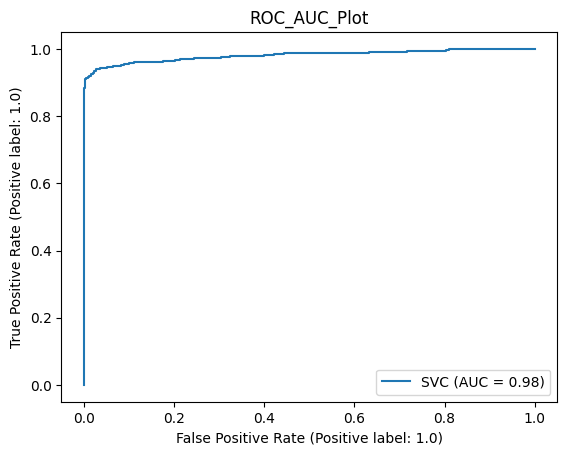

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       733
         1.0       0.99      0.90      0.94       347

    accuracy                           0.96      1080
   macro avg       0.97      0.95      0.96      1080
weighted avg       0.97      0.96      0.96      1080



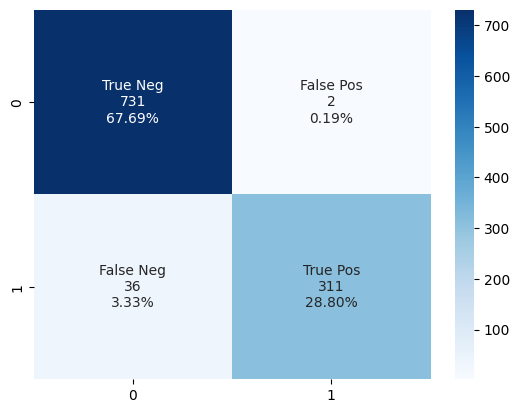

In [61]:
model(classifier_svc,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_svc,x_test2,y_test2)

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Cross Validation Score :  97.34%
ROC_AUC Score :  94.84%


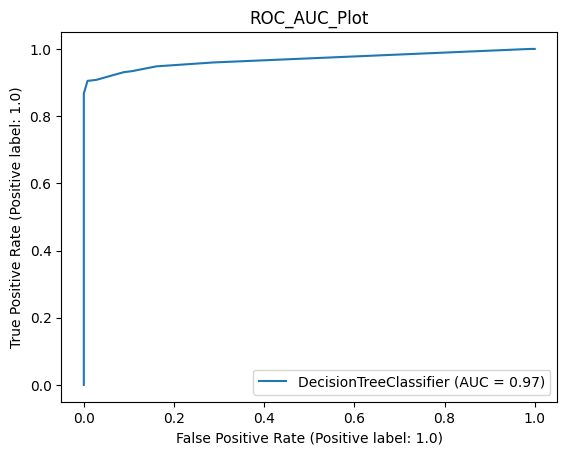

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       733
         1.0       0.98      0.90      0.94       347

    accuracy                           0.96      1080
   macro avg       0.97      0.95      0.96      1080
weighted avg       0.96      0.96      0.96      1080



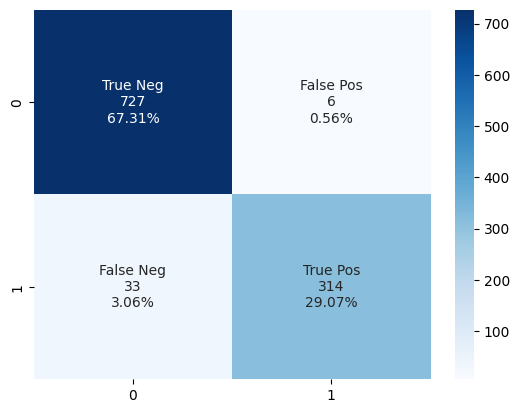

In [64]:
model(classifier_dt,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_dt,x_test1,y_test1)

Cross Validation Score :  97.82%
ROC_AUC Score :  95.56%


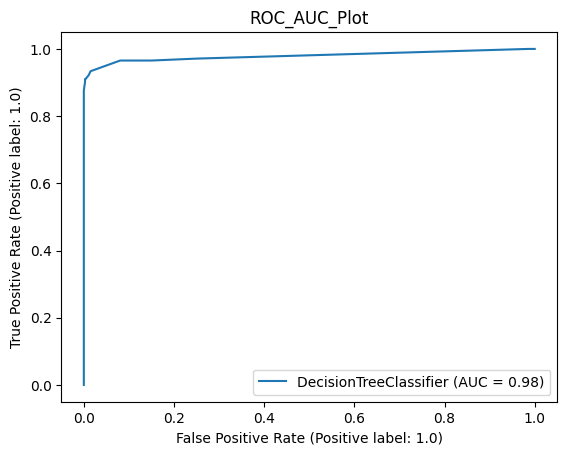

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       733
         1.0       0.98      0.92      0.95       347

    accuracy                           0.97      1080
   macro avg       0.97      0.96      0.96      1080
weighted avg       0.97      0.97      0.97      1080



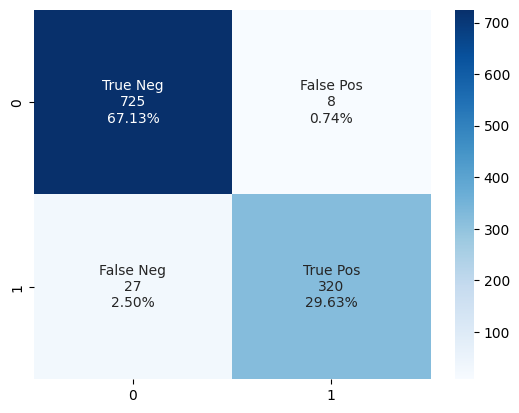

In [65]:
model(classifier_dt,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_dt,x_test2,y_test2)

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Cross Validation Score :  98.10%
ROC_AUC Score :  94.52%


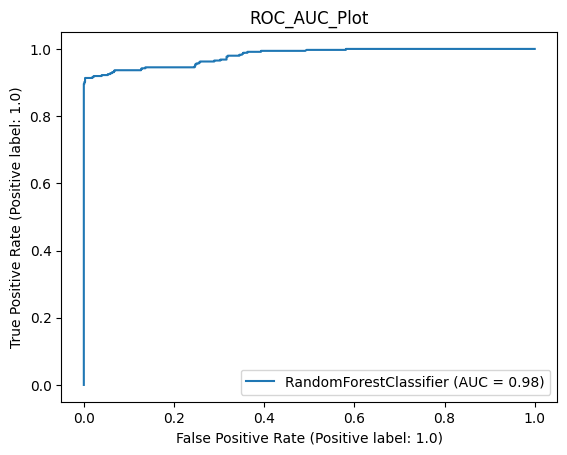

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       733
         1.0       1.00      0.89      0.94       347

    accuracy                           0.96      1080
   macro avg       0.98      0.95      0.96      1080
weighted avg       0.97      0.96      0.96      1080



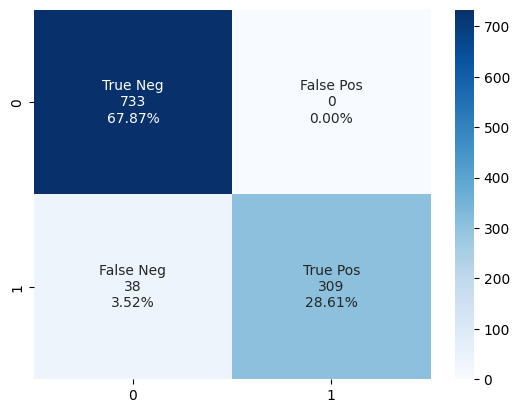

In [68]:
model(classifier_rf,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_rf,x_test1,y_test1)

Cross Validation Score :  98.36%
ROC_AUC Score :  94.24%


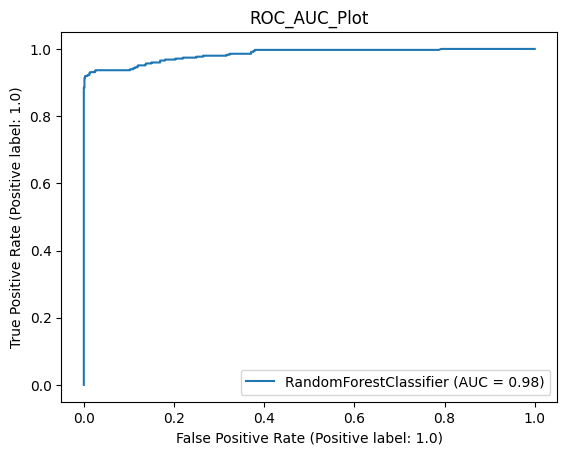

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       733
         1.0       1.00      0.88      0.94       347

    accuracy                           0.96      1080
   macro avg       0.97      0.94      0.96      1080
weighted avg       0.96      0.96      0.96      1080



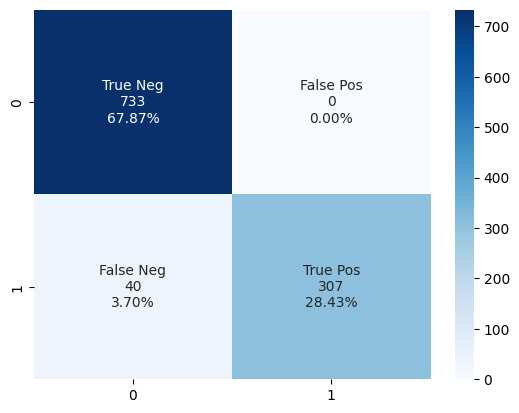

In [69]:
model(classifier_rf,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_rf,x_test2,y_test2)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Cross Validation Score :  99.37%
ROC_AUC Score :  98.95%


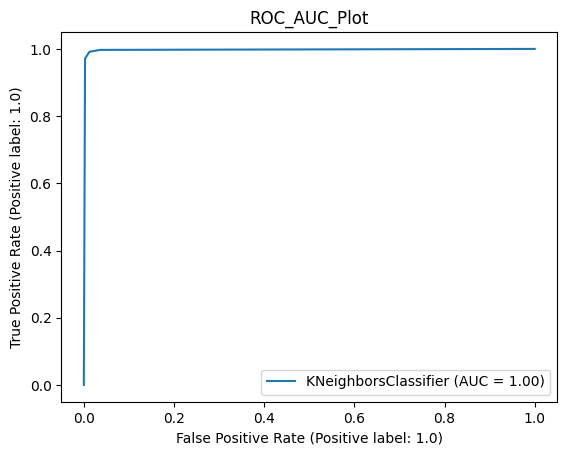

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       733
         1.0       0.97      0.99      0.98       347

    accuracy                           0.99      1080
   macro avg       0.99      0.99      0.99      1080
weighted avg       0.99      0.99      0.99      1080



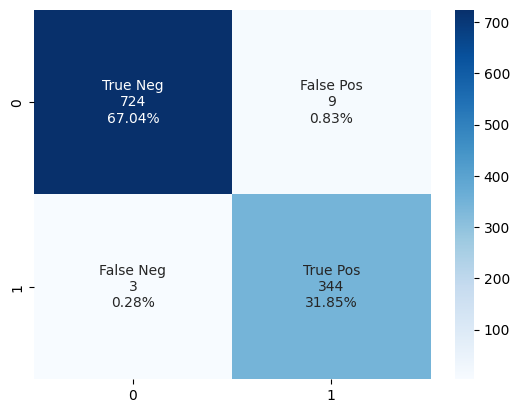

In [72]:
model(classifier_knn,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_knn,x_test1,y_test1)

Cross Validation Score :  99.44%
ROC_AUC Score :  98.16%


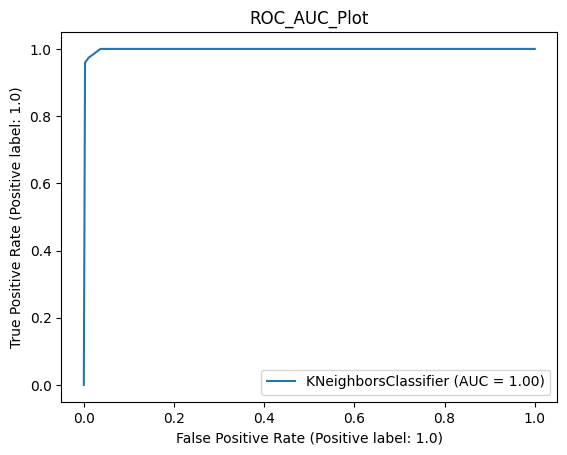

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       733
         1.0       0.98      0.97      0.98       347

    accuracy                           0.98      1080
   macro avg       0.98      0.98      0.98      1080
weighted avg       0.98      0.98      0.98      1080



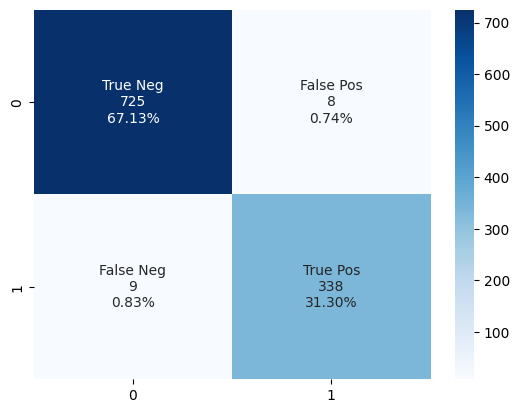

In [73]:
model(classifier_knn,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_knn,x_test2,y_test2)